# USA housing price prediction using scikit-learn.
## Considering Standard Scaler and Cross-Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('USA_Housing.csv')
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


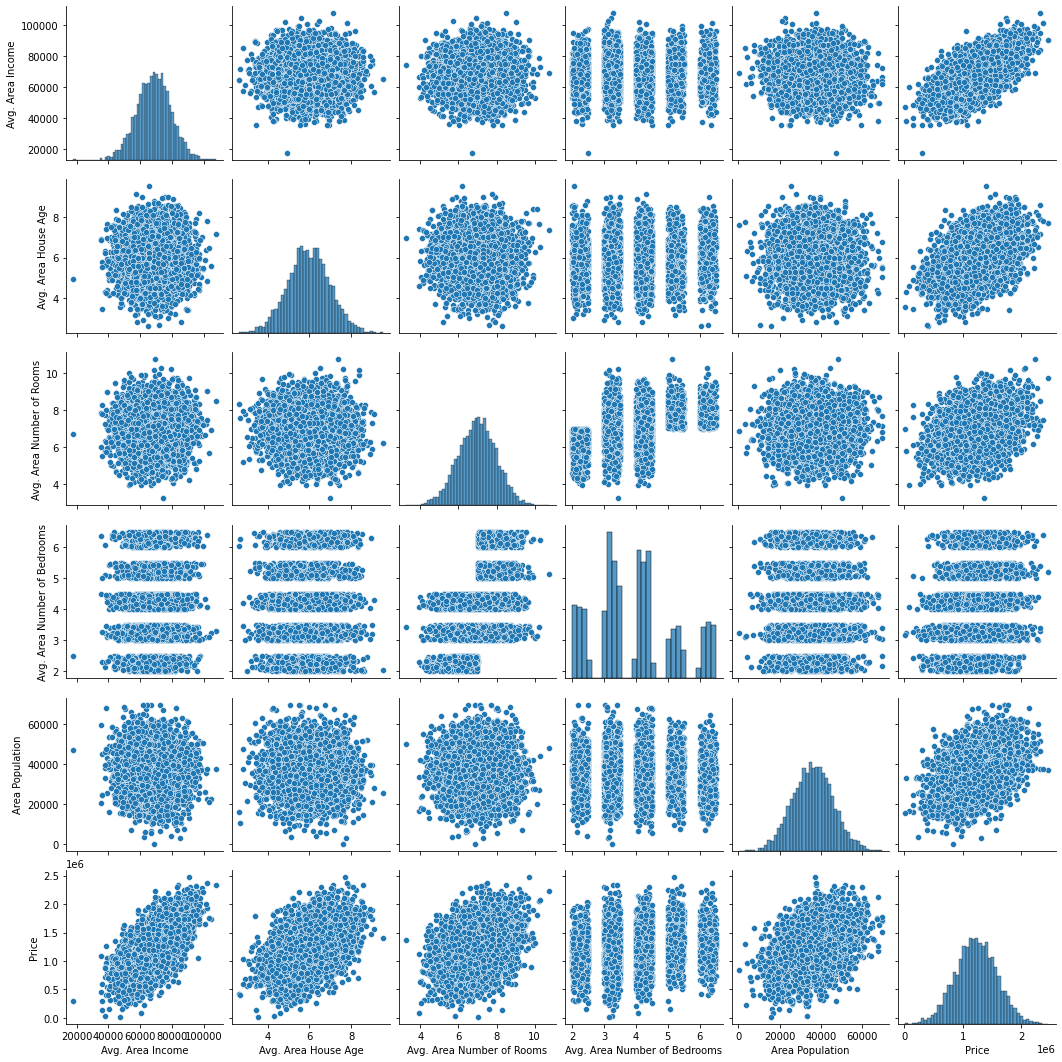

In [4]:
sns.pairplot(df.drop('Address', axis=1))
plt.savefig('pairplot.png', dpi=300)

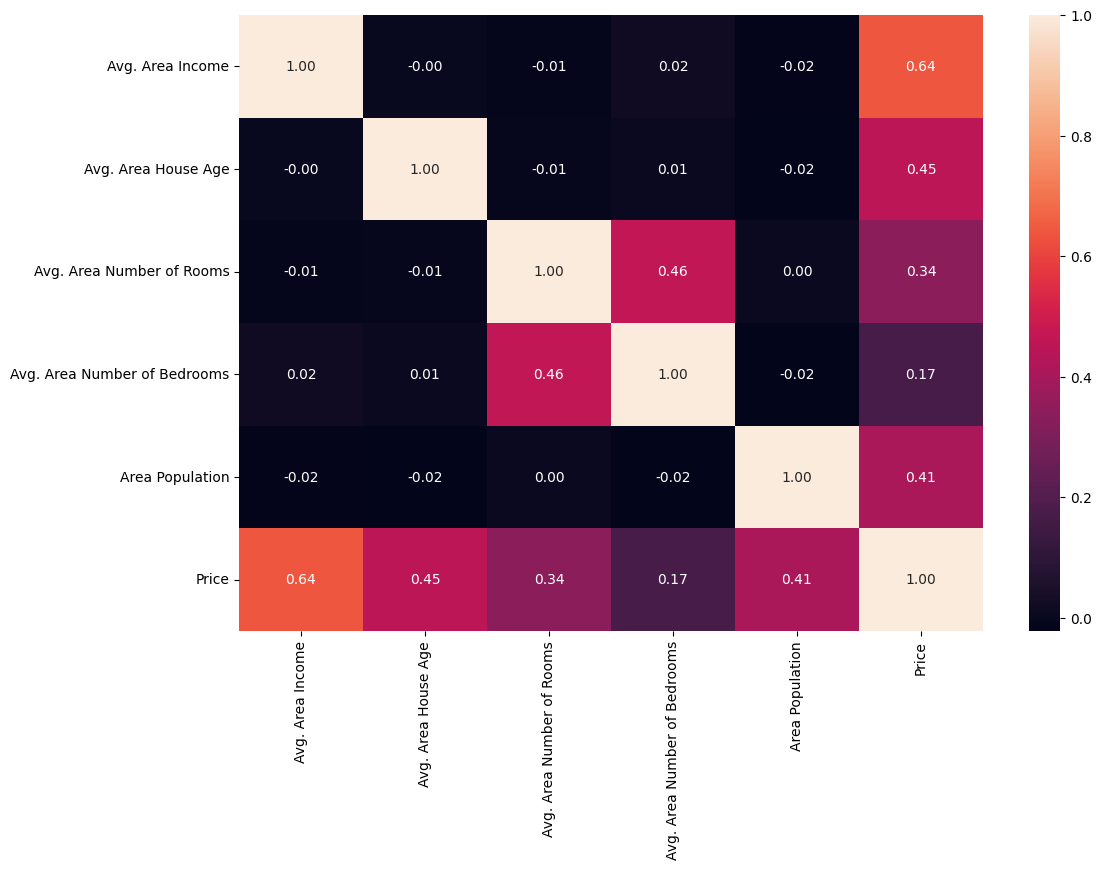

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.savefig('heatmap.png', dpi=300)

In [6]:
x= df.drop(['Address', 'Price'], axis=1)
y= df['Price']
x.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
[X_train, X_test ,y_train, y_test]=train_test_split(x,y, test_size=0.25, random_state=100)

## Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

ss = StandardScaler()
lr = LinearRegression()
ridge = Ridge(alpha=0.1)
lasso = Lasso()

clf = make_pipeline(ss, lr)
CV_lr = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean score for linear regression with 10-Fold cross validation=', 100*np.mean(CV_lr) )

clf = make_pipeline(ss, lasso)
CV_lasso = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean score for lasso regression with 10-Fold cross validation=', 100*np.mean(CV_lasso) )

clf = make_pipeline(ss, ridge)
CV_ridge = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean score for ridge regression with 10-Fold cross validation=', 100*np.mean(CV_ridge) )

clf = make_pipeline(PolynomialFeatures(2), lr)
CV_pr = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean score for polynomial regression with 10-Fold cross validation=', 100*np.mean(CV_pr) )

Mean score for linear regression with 10-Fold cross validation= 91.65801619066679
Mean score for lasso regression with 10-Fold cross validation= 91.65801716688972
Mean score for ridge regression with 10-Fold cross validation= 91.65801784542842
Mean score for polynomial regression with 10-Fold cross validation= 91.60813370837224


## Ridge Regression

In [10]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print('intercept:', ridge.intercept_)
print('coef:', ridge.coef_)
pred = ridge.predict(X_test)

intercept: -2636927.6070141583
coef: [2.15159227e+01 1.66180169e+05 1.20847980e+05 9.76022497e+02
 1.52817076e+01]


### Score

In [11]:
print('Ridge Regression score is ',round(100*ridge.score(X_test, y_test),2),'%')

Ridge Regression score is  91.98 %


### Merge

In [12]:
df_pred=pd.DataFrame(ridge.predict(X_test))
df_pred=df_pred.set_index(X_test.index)
df_pred.columns=['Price_pred']

In [13]:
df_merge = pd.concat([X_test, y_test,df_pred], axis=1)
df_merge.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Price_pred
789,62032.959468,5.235211,7.083483,4.39,25267.107607,8.008091e+05,8.141909e+05
2507,83896.357966,6.541530,5.258022,4.36,43672.628549,1.620949e+06,1.562322e+06
2376,64429.984778,6.436975,7.479371,3.31,39055.822286,1.219637e+06,1.322978e+06
1378,57714.752535,4.964760,7.798048,5.40,53100.998908,1.172133e+06,1.189026e+06
598,68363.259074,6.306369,6.358629,3.35,20667.902934,8.644838e+05,9.695025e+05


## Plotting

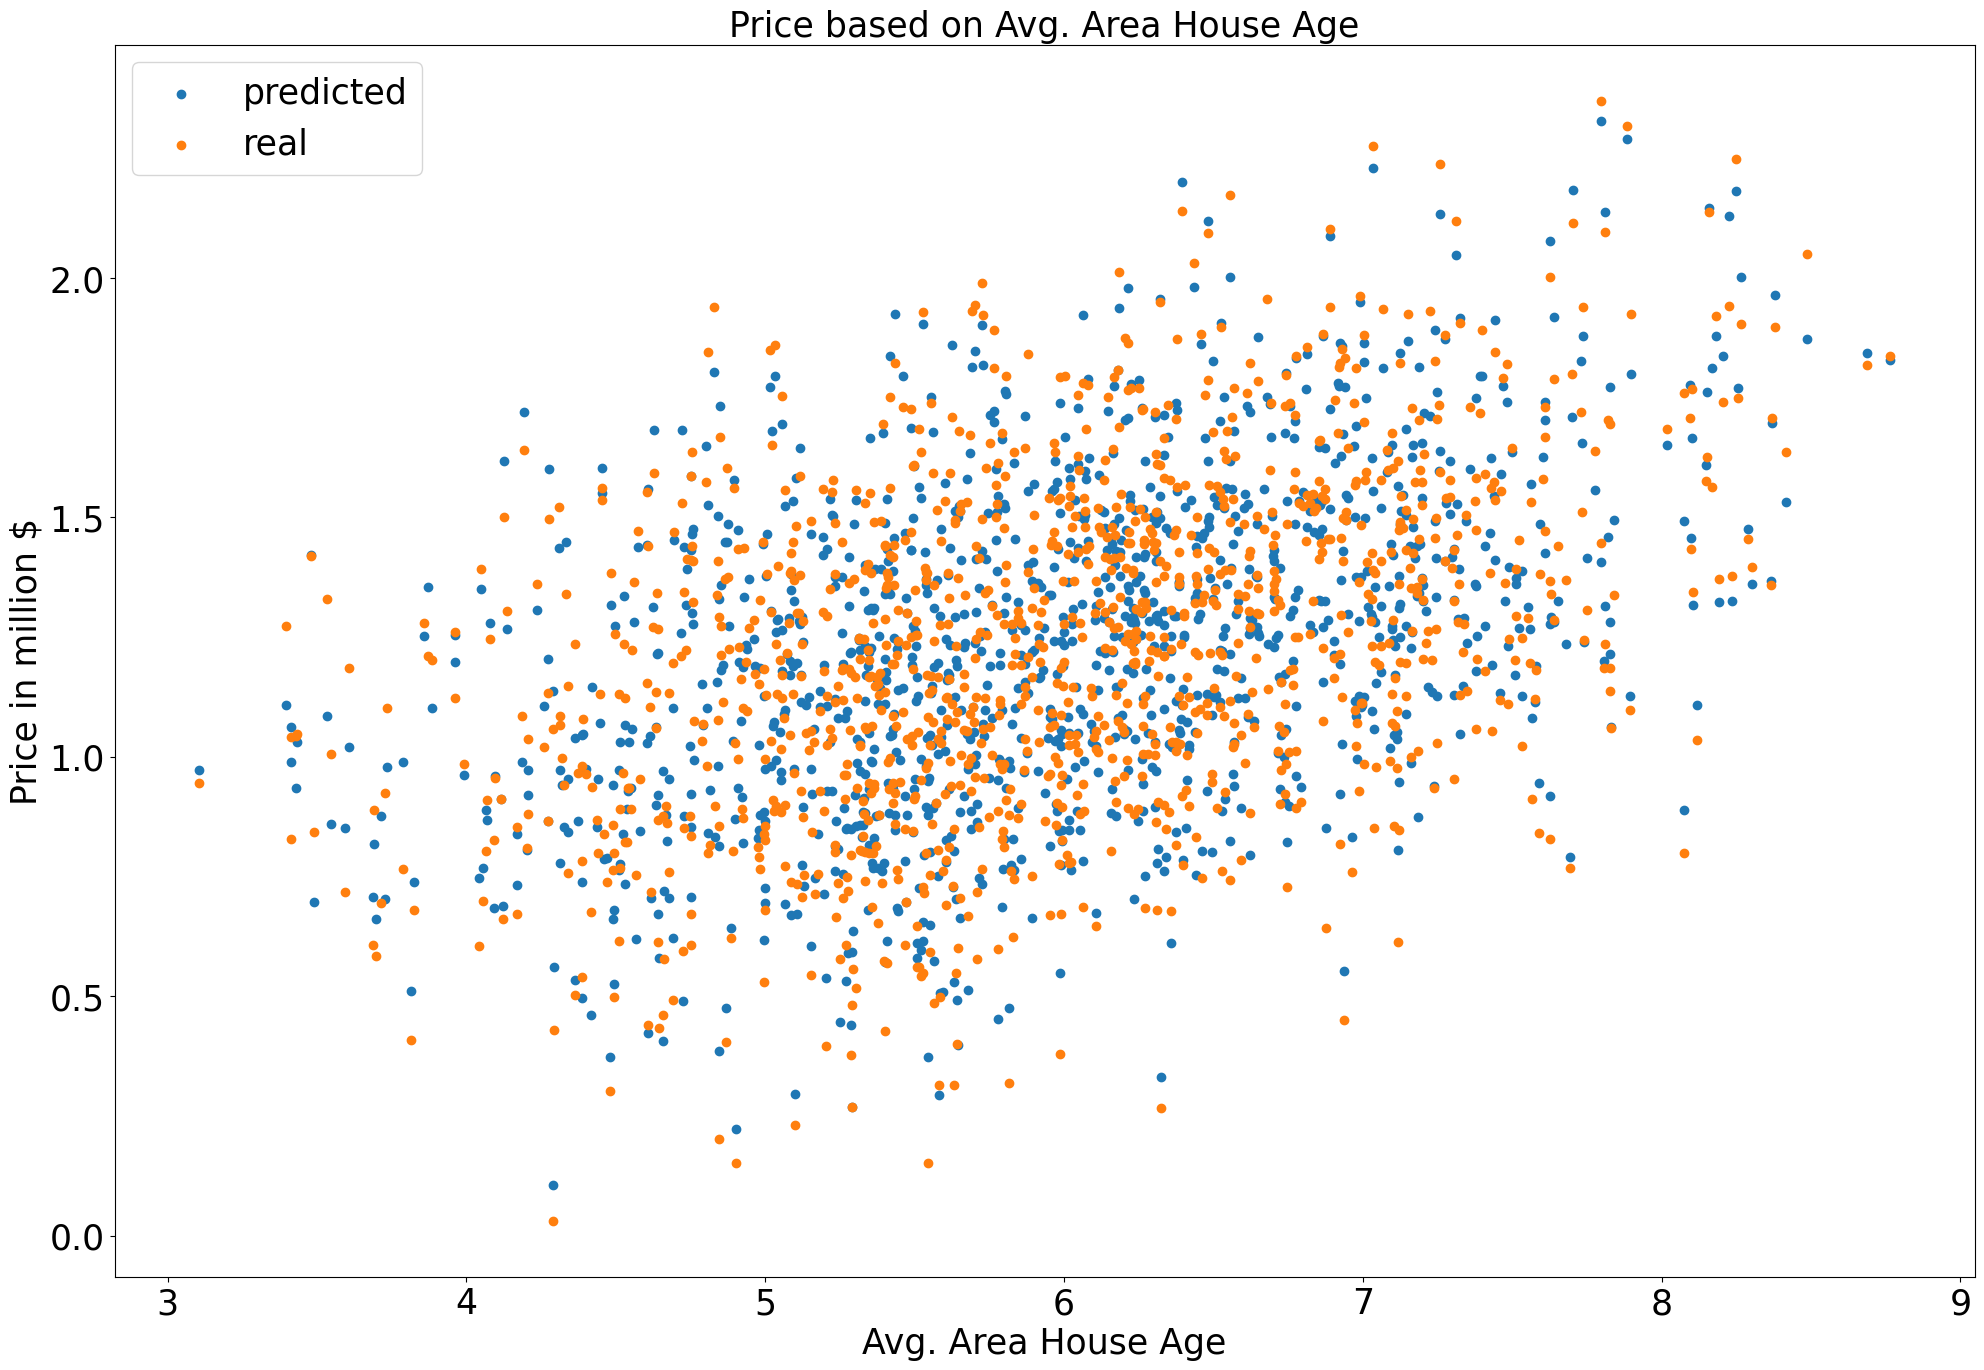

In [14]:
fig = plt.figure(figsize=(24, 16))
plt.scatter(df_merge['Avg. Area House Age'],df_merge['Price_pred']/1e6, label="predicted")
plt.scatter(df_merge['Avg. Area House Age'],df_merge['Price']/1e6, label="real")
plt.legend(loc="upper left",fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Price in million $',fontsize=25)
plt.xlabel('Avg. Area House Age',fontsize=25)
plt.title('Price based on Avg. Area House Age',fontsize=25)
plt.savefig('pred.png', dpi=300)

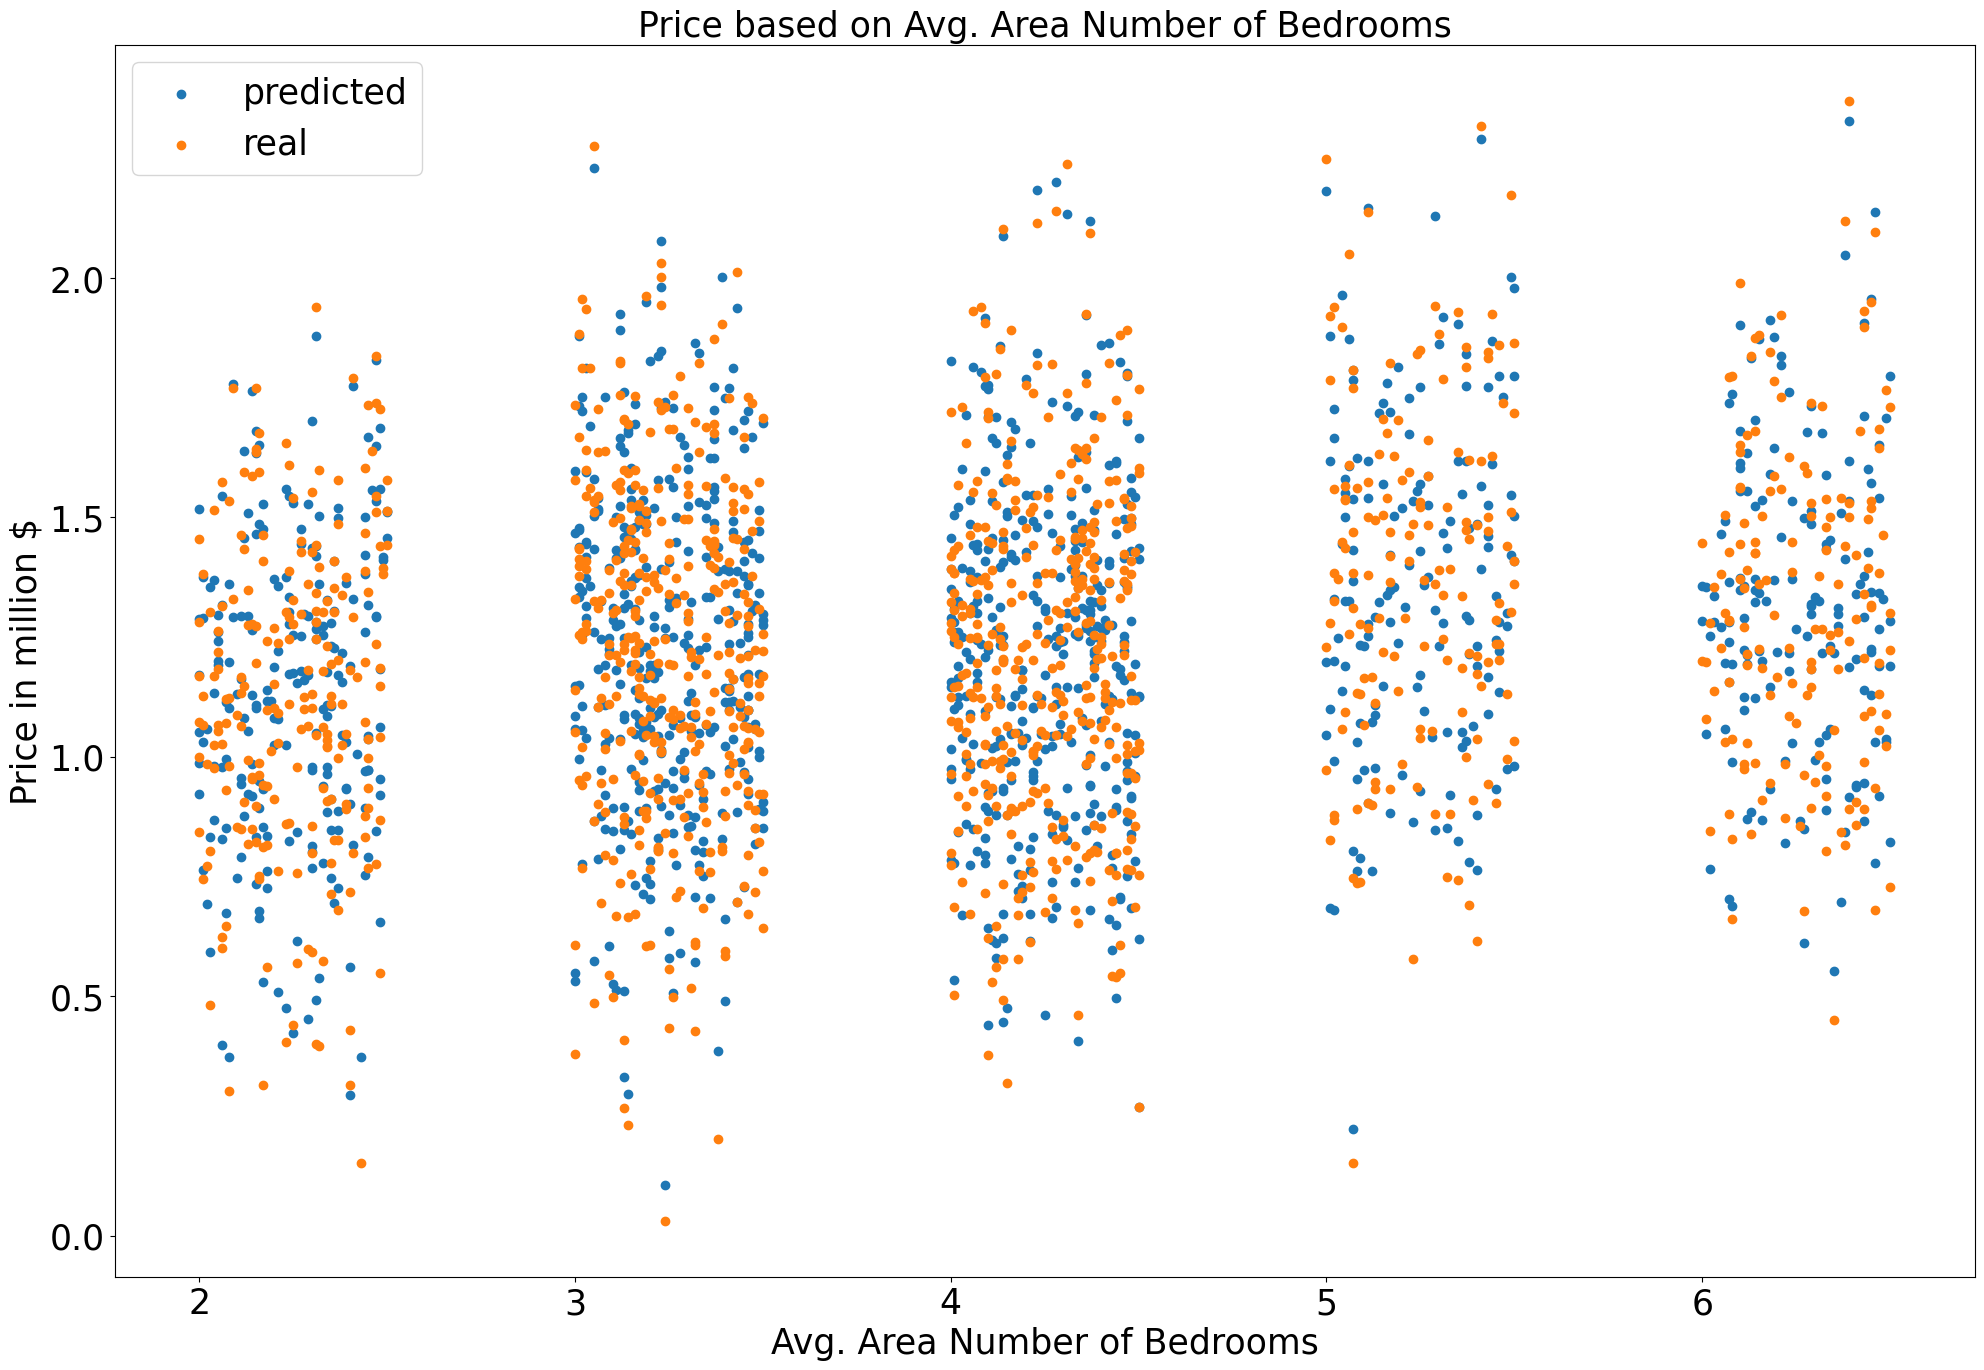

In [15]:
fig = plt.figure(figsize=(24, 16))
plt.scatter(df_merge['Avg. Area Number of Bedrooms'],df_merge['Price_pred']/1e6, label="predicted")
plt.scatter(df_merge['Avg. Area Number of Bedrooms'],df_merge['Price']/1e6, label="real")
plt.legend(loc="upper left",fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Price in million $',fontsize=25)
plt.xlabel('Avg. Area Number of Bedrooms',fontsize=25)
plt.title('Price based on Avg. Area Number of Bedrooms',fontsize=25)
plt.savefig('pred1.png', dpi=300)